<a id = "1"></a>
<h1 style="padding:10px;background-color:#A6ACAF;opacity: 0.8;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Mnist Digit Classification using CNN</h1><a id = "1"></a>

<a id = "1"></a>
<h1 style="padding:10px;background-color:#B05B5B;opacity: 0.8;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</h1><a id = "1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils  import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from PIL import Image
import warnings
warnings.filterwarnings("ignore", category=Warning, message=".*cuDNN.*")
warnings.filterwarnings("ignore", category=Warning, message=".*cuFFT.*")
warnings.filterwarnings("ignore", category=Warning, message=".*cuBLAS.*")

2024-05-19 11:36:45.223238: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 11:36:45.223405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 11:36:45.365647: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<a id = "1"></a>
<h1 style="padding:10px;background-color:#B05B5B;opacity: 0.8;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Loading Dataset</h1><a id = "1"></a>

In [2]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

<a id = "1"></a>
<h1 style="padding:10px;background-color:#B05B5B;opacity: 0.8;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploring Data </h1><a id = "1"></a>

In [3]:
print(f'Test Data Shape: {test.shape}')
print(f'Train Data Shape: {train.shape}')

Test Data Shape: (28000, 784)
Train Data Shape: (42000, 785)


In [4]:
# Check for NaN values
print(f'Training Data Nan values: {train.isnull().sum().sum()}')
print(f'Testing Data Nan values:{test.isnull().sum().sum()}')

Training Data Nan values: 0
Testing Data Nan values:0


In [5]:
# Fill NaN values with 0 (black pixel)
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [6]:
len(test)

28000

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [9]:
train['label'].nunique()

10

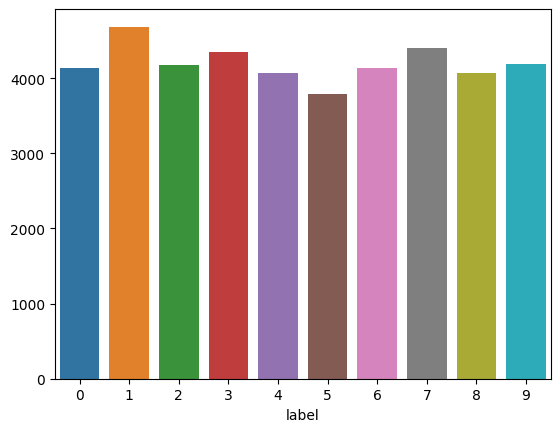

In [10]:
sns.barplot(x = train['label'].value_counts().index, y =train['label'].value_counts().values)
plt.show()

In [11]:
x_train = train.drop('label', axis = 1)
y_train = train['label']

In [12]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(f'X_train Shape: {x_train.shape}')
print(f'y_train Data Shape: {y_train.shape}')

X_train Shape: (42000, 784)
y_train Data Shape: (42000,)


<a id = "1"></a>
<h1 style="padding:10px;background-color:#B05B5B;opacity: 0.8;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</h1><a id = "1"></a>

In [14]:
X_train = x_train.values.reshape(x_train.shape[0],28, 28, 1)
X_test = test.values.reshape(test.shape[0],28, 28, 1)

In [15]:
X_train[0].shape

(28, 28, 1)

In [16]:
X_test[0].shape

(28, 28, 1)

In [17]:
y_train = to_categorical(y_train, num_classes = 10)

In [18]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

Text(0.5, 1.0, '1')

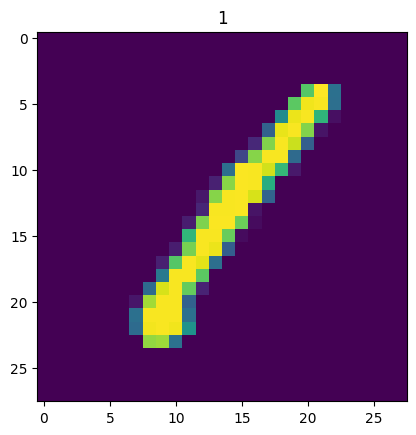

In [19]:
plt.imshow(X_train[0])
plt.title(train['label'][0])

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=2)

In [21]:
print(f'X_train Shape: {x_train.shape}')
print(f'X_val Data Shape: {y_train.shape}')

X_train Shape: (42000, 784)
X_val Data Shape: (33600, 10)


<a id = "1"></a>
<h1 style="padding:10px;background-color:#B05B5B;opacity: 0.8;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Architecture</h1><a id = "1"></a>

In [22]:
model = Sequential()

model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 12)       │         1,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,686 (22.21 KB)

 Trainable params: 5,686 (22.21 KB)

 Non-trainable params: 0 (0.00 B)

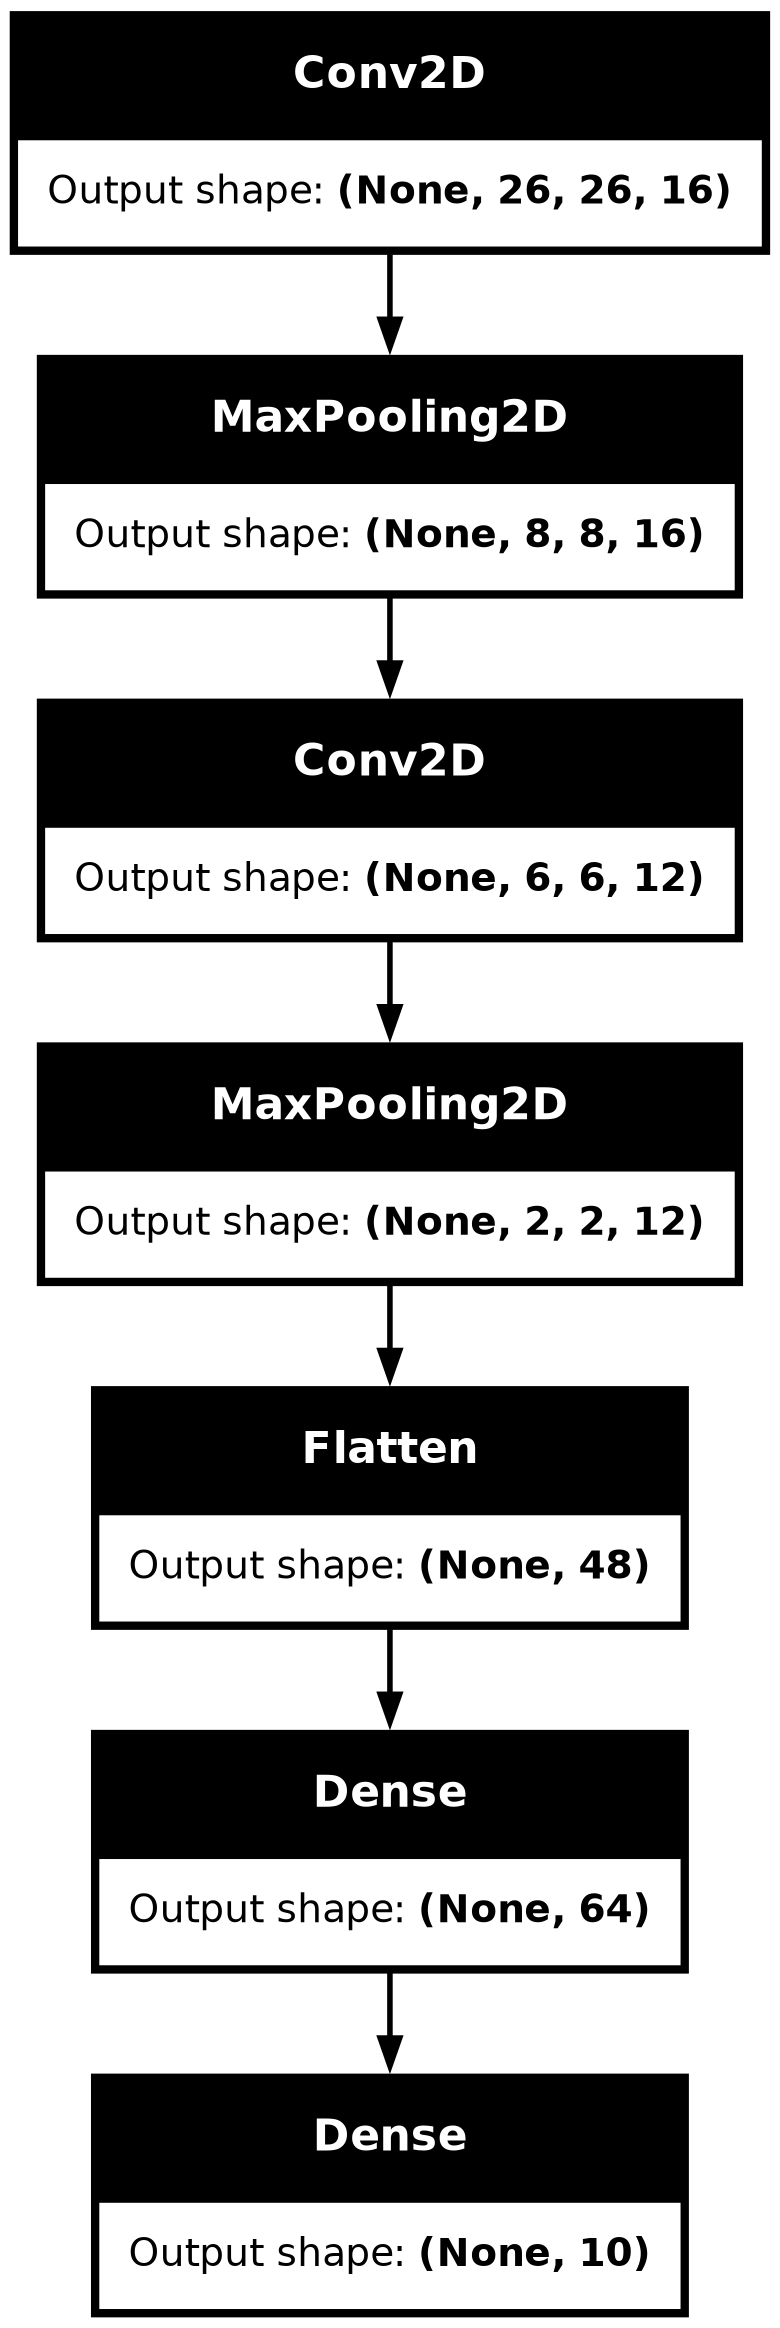

In [24]:
plot_model(model, show_shapes = True)

<a id = "1"></a>
<h1 style="padding:10px;background-color:#B05B5B;opacity: 0.8;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Compiling and Training Model</h1><a id = "1"></a>

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs= 10)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6881 - loss: 0.9545 - val_accuracy: 0.9249 - val_loss: 0.2287
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9471 - loss: 0.1726 - val_accuracy: 0.9521 - val_loss: 0.1512
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9605 - loss: 0.1268 - val_accuracy: 0.9656 - val_loss: 0.1090
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9680 - loss: 0.1025 - val_accuracy: 0.9649 - val_loss: 0.1102
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9734 - loss: 0.0836 - val_accuracy: 0.9694 - val_loss: 0.0955
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9743 - loss: 0.0809 - val_accuracy: 0.9661 - val_loss: 0.1036
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9783 - loss: 0.0664 - val_accuracy: 0.9720 - val_loss: 0.0853
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9813 -

<a id = "1"></a>
<h1 style="padding:10px;background-color:#B05B5B;opacity: 0.8;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Plotting loss and Accuracy</h1><a id = "1"></a>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

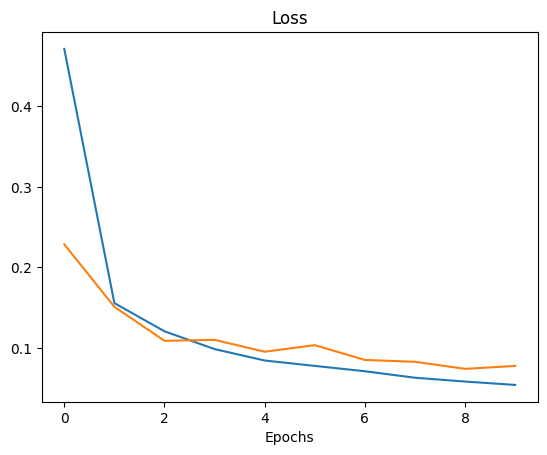

In [27]:
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

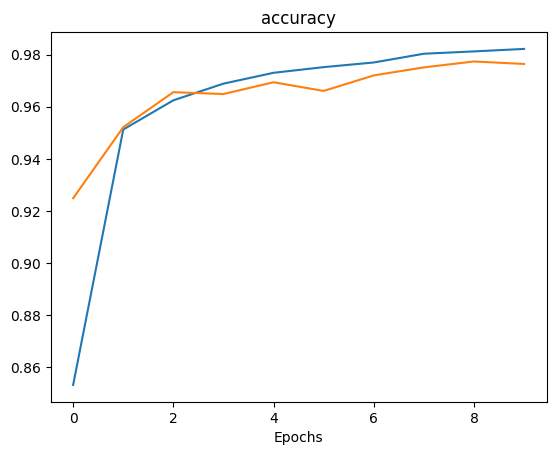

In [28]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')
plt.show()

<a id = "1"></a>
<h1 style="padding:10px;background-color:#B05B5B;opacity: 0.8;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Evaluation and Prediction</h1><a id = "1"></a>

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


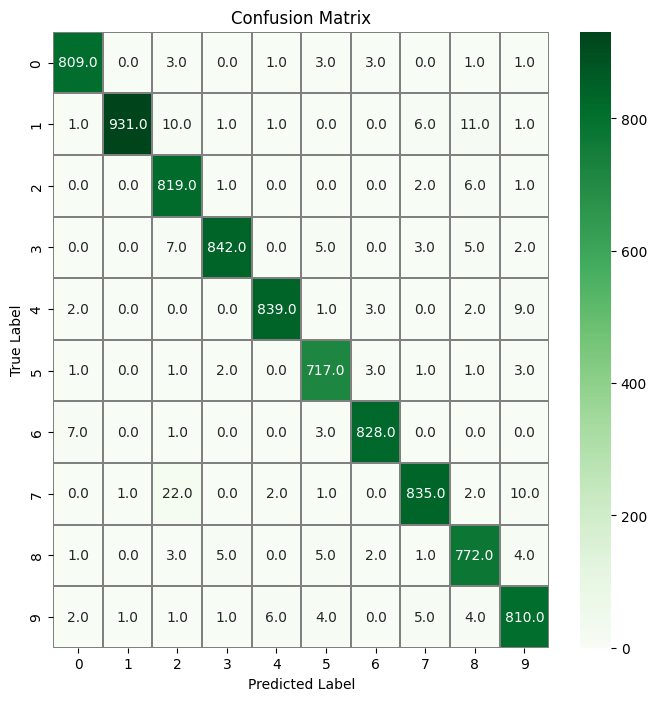

In [29]:
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


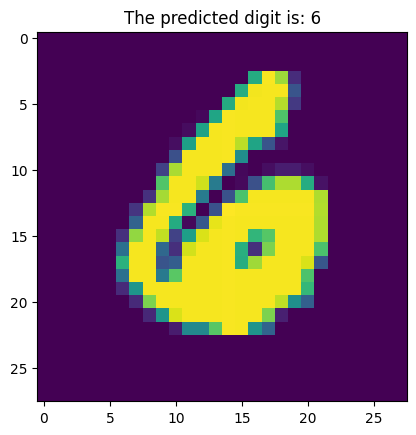

In [30]:
plt.imshow(X_val[10])
prediction = model.predict(X_val[10].reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)
plt.title(f'The predicted digit is: {predicted_digit}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


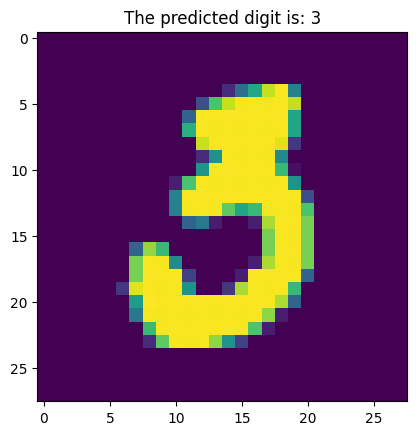

In [31]:
plt.imshow(X_val[35])
prediction = model.predict(X_val[35].reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)
plt.title(f'The predicted digit is: {predicted_digit}')
plt.show()

In [32]:
len(test)

28000

In [33]:
X_test = test.values.reshape(test.shape[0], 28, 28, 1)
X_test = X_test / 255.0
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
submission = pd.DataFrame({'ImageId': np.arange(1, len(predicted_labels) + 1), 'Label': predicted_labels})
submission.to_csv('Mnist_digit_submission.csv', index=False)

print('Submission file created successfully!')

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Submission file created successfully!
